## PYTHON'S SQL

#### Theory aspect

In [1]:
import sqlite3 as sql

In [2]:
class basis_data:
    def __init__(self, nama):
        self.nama = nama
    
    def open_connection(self):
        self.connection = sql.connect(self.nama)
        
    def create_table(self):
        table_query = '''create table if not exists students(
        id integer primary key autoincrement,
        name text not null,
        city text not null,
        score integer not null);''' #autoincrement menambahkan nilai otomatis 1-dst
        cursor = self.connection.cursor() #mengawali execute dengan connect cursor
        cursor.execute(table_query) #tiap fungsi crud query harus ada
        cursor.close() #tiap fungsi crud query harus ada
    
    #list_data = [[x,y,z],[a,b,c],...]
    def input_data(self, name, city, score):
        crud_query = '''insert or ignore into students (
        name, city, score) values (?,?,?);'''
        cursor = self.connection.cursor()
        cursor.execute(crud_query, (name, city, score)) 
        cursor.close()                                  
    #jika hanya satu data input, maka: (crud_query(name,))
    #name saja malah dihitung sbg n,a,m,e
    
    def show_data(self):
        show_query = 'select * from students'
        cursor = self.connection.cursor()
        cursor.execute(show_query)
        result = cursor.fetchall()
        cursor.close()
        return print(result)
    
    def close_connection(self):
        self.connection.commit()
        self.connection.close()
        
database = 'trial_test.db'
data = basis_data(database)
data.open_connection()
# data.create_table()

# list_data = [['Julius Nemesis', 'Singapore', 100],['Ratkhappan Nikhun', 'Bangkok', 98],['Titus Alexis', 'Manila', 95]]
# for item in list_data:
#     data.input_data (item[0], item[1], item[2])

# data.close_connection()

data.show_data()
data.close_connection()

[(1, 'Julius Nemesis', 'Singapore', 100), (2, 'Ratkhappan Nikhun', 'Bangkok', 98), (3, 'Titus Alexis', 'Manila', 95)]


#### Assignment

Dengan Menggunakan data Chinook yang ada pada materi SQL
Query, lakukanlah analisis sederhana penjualan bulan
Februari – Juni 2009:
    
- Dengan menggunakan modul sqlite3 (untuk pengguna sqlite)
buka semua data yang dibutuhkan ke dalam python.
- Lakukan semua visualisasi yang dibutuhkan dengan data
yang telah di ambil dari basisdata memanfaatkan library
sqlite3 (untuk pengguna sqlite). Visualisasi boleh
menggunakan matplotlib, seaborn, plotly, dsb.


Ketentuannya:
- Masukkan semua data yang dibutuhkan (kode, visualisasi,
analisis) kedalam file pdf.
- Panjang Analisis dibebaskan, bahkan jika hanya ingin
menganalisa plot di atas (Pembeli terhadap Total Penjualan)
dipersilahkan.

In [3]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
connection = sql.connect('chinook.db')
crud_query = '''select b.FirstName ||' '|| b.LastName as Name, a.InvoiceDate as Date, a.Total
from invoices as a
inner join customers as b
on a.CustomerId = b.CustomerId
where a.InvoiceDate > '2009-02-01' and a.InvoiceDate < '2009-06-30)'
ORDER by date;'''

# crud_query = '''select b.FirstName ||' '|| b.LastName as Name, a.Total
# from invoices as a
# inner join customers as b
# on a.CustomerId = b.CustomerId
# where a.InvoiceDate > '2009-02-01' and a.InvoiceDate < '2009-06-30)'
# ORDER by Name;'''

cursor = connection.cursor()
cursor.execute(crud_query)
hasilsemua =  cursor.fetchmany(45)
#bisa dipilih salah satu
cursor.close()
connection.close()

hasilsemua
my_tuple = hasilsemua
newdata = np.asarray(my_tuple)

In [5]:
df = pd.DataFrame(newdata)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       35 non-null     object
 1   1       35 non-null     object
 2   2       35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


In [7]:
df.columns = ['Nama', 'Tanggal', 'Total']
df

,Nama,Tanggal,Total
0,Niklas Schröder,2009-02-01 00:00:00,1.98
1,Dominique Lefebvre,2009-02-01 00:00:00,1.98
2,Wyatt Girard,2009-02-02 00:00:00,3.96
3,Hugh O'Reilly,2009-02-03 00:00:00,5.94
4,Emma Jones,2009-02-06 00:00:00,8.91
5,Leonie Köhler,2009-02-11 00:00:00,13.86
6,Frank Harris,2009-02-19 00:00:00,0.99
7,Jack Smith,2009-03-04 00:00:00,1.98
8,Tim Goyer,2009-03-04 00:00:00,1.98
9,Kathy Chase,2009-03-05 00:00:00,3.96


In [8]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format = '%Y/%m/%d', errors = 'coerce')
df

,Nama,Tanggal,Total
0,Niklas Schröder,2009-02-01,1.98
1,Dominique Lefebvre,2009-02-01,1.98
2,Wyatt Girard,2009-02-02,3.96
3,Hugh O'Reilly,2009-02-03,5.94
4,Emma Jones,2009-02-06,8.91
5,Leonie Köhler,2009-02-11,13.86
6,Frank Harris,2009-02-19,0.99
7,Jack Smith,2009-03-04,1.98
8,Tim Goyer,2009-03-04,1.98
9,Kathy Chase,2009-03-05,3.96


In [11]:
df['Total'] = df['Total'].apply(float)
df

,Nama,Tanggal,Total
0,Niklas Schröder,2009-02-01,1.98
1,Dominique Lefebvre,2009-02-01,1.98
2,Wyatt Girard,2009-02-02,3.96
3,Hugh O'Reilly,2009-02-03,5.94
4,Emma Jones,2009-02-06,8.91
5,Leonie Köhler,2009-02-11,13.86
6,Frank Harris,2009-02-19,0.99
7,Jack Smith,2009-03-04,1.98
8,Tim Goyer,2009-03-04,1.98
9,Kathy Chase,2009-03-05,3.96


In [12]:
df2 = df.groupby(['Nama']).sum()
df2

,Total
Nama,
Bjørn Hansen,5.94
Dominique Lefebvre,15.84
Eduardo Martins,8.91
Ellie Sullivan,0.99
Emma Jones,8.91
Enrique Muñoz,0.99
Fernanda Ramos,1.98
Frank Harris,0.99
Hannah Schneider,15.84


In [13]:
df2 = df2.sort_values(by=['Total'], ascending=False)
df2

,Total
Nama,
Dominique Lefebvre,15.84
Tim Goyer,15.84
Hannah Schneider,15.84
Luis Rojas,15.84
Leonie Köhler,13.86
Wyatt Girard,9.90
Kathy Chase,9.90
Eduardo Martins,8.91
Emma Jones,8.91


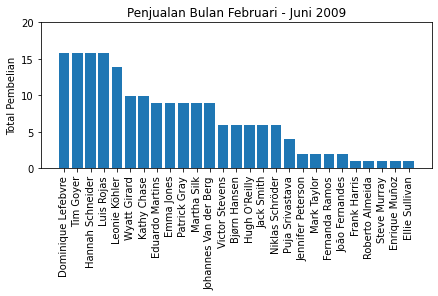

In [16]:
plt.bar(df2.index, df2['Total'], align='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Total Pembelian')
plt.title('Penjualan Bulan Februari - Juni 2009')
axes = plt.gca()
axes.set_ylim([0,20])
plt.show()